<a href="https://colab.research.google.com/github/imsmahi/Machine_Learning1_IA1_2324/blob/main/TP_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP n°2: Implémentation d'un perceptron (Version Draft)**

**Auteur:** SMAHI Mohammed Ismail / Benledghem Rafika

**Année:** 2022/2023

**Module:** Apprentissage statistique

**Promotion:** Modèles intelligents et décision MID

**Département:** d'Informatique (Université de Tlemcen)

**L’objectif** du TP est d'implémenter votre tout premier réseau de neurones. L'étudiant doit se familia44e444szriser avec les notions d'apprentissage supervisé, la propagation, la rétro-propagation, la descente de gradient, la fonction perte, etc.

Pour cela, nous construisons un réseau de neurone(s) très simple avec un seul neurone. Nous considérons une seule entrée qui représente des valeurs de température en degrés Celsius, et qui est connectée à un seul neurone (également la sortie) qui représente les mêmes valeurs mais exprimées, cette fois-ci, en Fahrenheit.

<img src="https://drive.google.com/uc?id=1NaYw6OrIwapvB0HNuRPop0xNsln1eu9C" ></img>

Notre premier modèle va s’entraîner avec les données d'entrée et de sortie correspondante. L'objectif final est que le modèle va apprendre à multiplier l'entrée par 1.8 puis d'additionner 32 pour obtenir le résultat correct (voir figure).



## Les différents imports

In [ ]:
import matplotlib.pyplot as plt
import random
import math

## Equation de conversion

Pour convertir en degrés Celsius une température donnée en degrés Fahrenheit, il suffit de soustraire 32 et de diviser par 1,8 (9/5 = 1,8) le nombre ainsi obtenu.

In [ ]:
def celsius_to_fahrenheit(celsius):
    return (celsius * 1.8) + 32

## Génération de données

Pour ce TP, l'apprentissage s'effectuera sur un intervalle de 100 valeurs (comprises entre -50 et 50).

*   Les températeurs en Celsius sont contenues dans le tableau `celsius_values`.
*   Les températeurs en Fahrenheit sont contenues dans le tableau `fahrenheit_values`.

In [ ]:
celsius_values = range(-50,50)
fahrenheit_values = []

In [ ]:
SAMPLE_SIZE = len(celsius_values)
for i in range(SAMPLE_SIZE):
   fahrenheit_values.append(celsius_to_fahrenheit(celsius_values[i]))

## La Phase de propagation

In [ ]:
weight = random.random()
bias = random.random()

def forward():

  Predicted_output = []

  for i in range(SAMPLE_SIZE):
      Predicted_outputs= celsius_values[i] * weight + bias
      Predicted_output.append(Predicted_outputs)

  cumulative_loss = 0

  for i in range(SAMPLE_SIZE):
      cumulative_loss += math.pow(Predicted_output[i] - fahrenheit_values[i], 2)

  loss = cumulative_loss / SAMPLE_SIZE

  return Predicted_output, loss

## La phase de rétro-propagation

In [ ]:
def backward(output):

  grad_output = []

  for i in range(SAMPLE_SIZE):
      grad_outputs= 2*(output[i] - fahrenheit_values[i])/SAMPLE_SIZE
      grad_output.append(grad_outputs)

  grad_weight = 0

  for i in range(SAMPLE_SIZE):
      grad_weight+= celsius_values[i] * grad_output[i]

  grad_bias = sum(grad_output)

  return grad_weight, grad_bias

## Processus d'apprentissage

### Modification des paramètres

In [ ]:
LEARNING_RATE = 0.0001

def update_parameters(grad_weight, grad_bias):
  global weight, bias

  descent_grad_weight = LEARNING_RATE * grad_weight
  descent_grad_bias = LEARNING_RATE * grad_bias

  weight = weight - descent_grad_weight
  bias = bias - descent_grad_bias

### Apprentissage

In [ ]:
def train(epoch=500):
  for t in range(epoch):
      output, loss = forward()
      grad_weight, grad_bias = backward(output)
      update_parameters(grad_weight, grad_bias)

In [ ]:
def get_predicted_fahrenheit_values():
  prediction, loss = forward()
  return prediction

In [ ]:
epoch=200
predicted_before_training = get_predicted_fahrenheit_values()
train(epoch)
predicted_after_training = get_predicted_fahrenheit_values()

### Visualisation des résultats

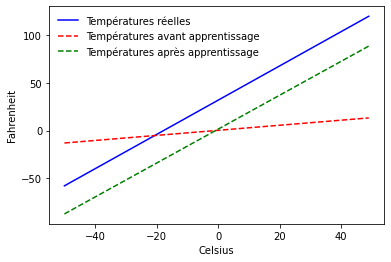

In [ ]:
fig, ax = plt.subplots()
ax.plot(celsius_values, fahrenheit_values, '-b', label='Températures réelles')
ax.plot(celsius_values, predicted_before_training, '--r', label='Températures avant apprentissage')
ax.plot(celsius_values, predicted_after_training, '--g', label='Températures après apprentissage')
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
ax.legend(frameon=False)
plt.show()

# Travail demandé


*   **$Q_0$:** Exécuter et commenter le code source ci-dessus.
*   **$Q_1$:** Afficher la valeur des variables `weight` et `bias`. Que remarquez vous !
*   **$Q_2$:** Augmenter la valeur de la variable `epoch` et exécuter l'apprentissage. Que remarquez vous !
*   **$Q_3$:** Sauvegarder les valeurs de la variable `loss` pour chaque itération.
*   **$Q_4$:** Afficher dans un diagramme la courbe de convergence de la variable `loss`.

*   **$Q_5$:** Modifier le programme de telle sorte que les données d'entrée et de sortie soient dans la même structure de données (Dataframe).

*   **$Q_6$:** Diviser les données de telle sorte à utiliser une partie pour l'apprentissage et une deuxième partie pour la phase des test. La proportion de division est de 80% pour l'apprentissage et 20% pour la phase de test.

*   **$Q_7$:** Implémenter la fonction sigmoid: $sigmoid(z)=\frac{1}{1+e^{-z}}$

*   **$Q_{8}$:** Proposer une version améliorée.

*   **$Q_9$:** Modifier la structure du réseau en ajoutant un nouveau neurone connecté à la sortie du neurone initial.

<img src="https://drive.google.com/uc?id=1R-LeBAGzVA7fnIEjR1dsYUdB-ial3sQc" height=65></img>

*   **$Q_{10}$:** Modifier la structure précédente comme suit:

<img src="https://drive.google.com/uc?id=1kNztwzC5Wl3gaaYbEk5wZu2T--gWzLXR" height=150></img>

